# 0.1 Introduction 

In this session we will outline a basic environmental data work-flow. Our goal is to highlight common data tasks, and typical ways to solve them in Python.

When working with environmental data, there are usually a few steps that come up each time. These are:

- **reading**. Typically data is read from text files, but can also come from the internet or in other format p
- **processing**. The data we read is usually a little untidy , for example we may need to subset to correct dates.
- **plotting**. Plotting data is always worth doing as early as possible. Use histograms or simple line plots as your first steps in visualising data.

In this notebook we will work through each step in turn with example data. We will once again work with data downloaded from SMARTSMEAR, in this case we will use flux data measured using the eddy co-variance technique at SMEARII research station. We will use Temperature which is measured at 16.8m Height, Gross Primary Production (GPP) which is derived from measurements of CO2 exchange, and Evapotranspiration (ET) which is derived from measurements of H2O exchange.

To do these efficiently in Python we need to use additional software libraries (packages of pre-written code). The main package that we will use is **Pandas** which is for data analysis. Note that a great deal of Pandas functionality is very similar to R, in fact Pandas inspired by R's success. 

Before we start there is one other thing we should mention.In this session we will assume that terms like function, argument are familiar to you. If they are not then go back to R1-introduction.ipynb, and check the definition. If you cannot find the definition in there then complain to your instructors to update the intro! Alright, let's get started.

# 1. Reading

Our first task is to read in our GPP, ET and temperature data. Reading data takes data from storage (typically your computer's hard disk) and places it somewhere (in RAM) that is can be operated on by R. We have already downloaded our data as two seperate text files from SMARTSMEAR, and stored these files in the /data directory (folder) on github: https://github.com/OptPhotLab/EnvDataSciNotebooks/tree/master/data (You can inspect the data files by clicking the github link, but opening the individual files on github could slow your computer down!).

We will use the Pandas **read.csv** function to read our data. Whenever we use an external library, we first need to import it:

In [1]:
import pandas as pd

The line above imports pandas to our working environment. The convention is to use the *as* statement to (locally) rename the module to *pd* as it is shorted to write. Everytime we need to use pandas code we first type *pd* then we access functionality using an additional dot *.* and the function name. For example, to read in the GPP data use the *read_csv* function:  

In [2]:
gpp = pd.read_csv("../data/gppsmeardata_20160101120000.csv")

Go ahead and read the ET data, which you can find in the same location, using the *read_csv* method: 

In [3]:
et = pd.read_csv("../data/ET smeardata_20160101120000.csv")

Just line in R, we can use *head* function to inspect our objects (*gpp*). However, unlike *R* we use the dot operator to access the method directly on the object itself:

In [4]:
gpp.head()

,Year,Month,Day,Hour,Minute,Second,HYY_EDDY233.GPP
0,2016,1,1,0,0,0,0.430
1,2016,1,1,0,30,0,0.318
2,2016,1,1,1,0,0,-0.219
3,2016,1,1,1,30,0,0.220
4,2016,1,1,2,0,0,0.123


So what is going on here? *gpp* is a pandas dataframe object that contains not just data that we read in, but also *methods* (functions) that operate on this data. This concept is one of the core ideas behind [object orientated programming](https://www.datacamp.com/community/tutorials/python-oop-tutorial). The main thing to [grok](https://en.wikipedia.org/wiki/Grok) at this point is that in python *everything* is an object!  

We can inspect the attributes, methods and data of any object using the [*Built-in*](https://docs.python.org/3/library/functions.html) function *dir()*. Try it below:    

In [5]:
dir(gpp)

['Day',
 'Hour',
 'Minute',
 'Month',
 'Second',
 'T',
 'Year',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__

If you scroll past the underscrored names at the start, then you will see that attributes are listed in alphabetical orders, you can see *head* part way down the list. So what's the idea with the underscores? You can more about that [here](https://stackoverflow.com/questions/1301346/what-is-the-meaning-of-a-single-and-a-double-underscore-before-an-object-name). 

# 2. Processing

Before we can make any graphs or perform any stats we usually have to tidy our data
and there are a bunch of techniques in R that can help out with this. Let's 
check out a few of them that make life easier.

## 2.1. Merging and renaming columns 

We have read in *two* different data files which have same first six columns. We can make life easier by combining these into a single dataframe:

In [6]:
gpp_et = gpp.merge(et)

Use *head* to check the combination worked:

In [7]:
gpp_et.head()

,Year,Month,Day,Hour,Minute,Second,HYY_EDDY233.GPP,HYY_EDDY233.ET_gapf
0,2016,1,1,0,0,0,0.430,0.102
1,2016,1,1,0,30,0,0.318,0.035
2,2016,1,1,1,0,0,-0.219,-0.042
3,2016,1,1,1,30,0,0.220,0.043
4,2016,1,1,2,0,0,0.123,0.027


Now let's read the third file (*T168_20160101120000.csv*), which is temperature data, into Python. When you have read it in with name *t*, merge it with *gpp_et* to make *gpp_et_t* dataframe:

 

In [9]:
# TIP for t then read.csv
# TIP apply merge on gpp_et
t = pd.read_csv("../data/T168_20160101120000.csv")
gpp_et_t = gpp_et.merge(t)
gpp_et_t.head()

The names of the columns are a little long, we can shorten them to make our life easier:  

In [11]:
gpp_et_t.rename(columns={'HYY_EDDY233.GPP':'GPP','HYY_EDDY233.ET_gapf':'ET',
                         'HYY_META.T168':'T168'}, inplace=True)
gpp_et_t.head()

,Year,Month,Day,Hour,Minute,Second,GPP,ET,T168
0,2016,1,1,0,0,0,0.430,0.102,-6.527667
1,2016,1,1,0,30,0,0.318,0.035,-6.520333
2,2016,1,1,1,0,0,-0.219,-0.042,-6.594666
3,2016,1,1,1,30,0,0.220,0.043,-6.551667
4,2016,1,1,2,0,0,0.123,0.027,-6.366000


## 2.2 Subsetting
Often we download much more data than we need. We use *indexing* to subset data. We can index data by selecting data from a single column which meets a specific condition. We select a single column using its name (as a string) and [] indexing brackets, try it out for the *month* column:

In [12]:
gpp_et_t['Month']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
17586    1
17587    1
17588    1
17589    1
17590    1
17591    1
17592    1
17593    1
17594    1
17595    1
17596    1
17597    1
17598    1
17599    1
17600    1
17601    1
17602    1
17603    1
17604    1
17605    1
17606    1
17607    1
17608    1
17609    1
17610    1
17611    1
17612    1
17613    1
17614    1
17615    1
Name: Month, Length: 17616, dtype: int64

Now suppose we were interested in data from September, we can use this month column with a logical comparison (*==*) to subset the dataframe:


In [16]:
data_sep = gpp_et_t[(gpp_et_t['Month']==9)]
data_sep.head()

,Year,Month,Day,Hour,Minute,Second,GPP,ET,T168
11712,2016,9,1,0,0,0,-0.0,0.320,12.817667
11713,2016,9,1,0,30,0,-0.0,0.515,12.569333
11714,2016,9,1,1,0,0,-0.0,0.577,12.698334
11715,2016,9,1,1,30,0,-0.0,0.596,12.880333
11716,2016,9,1,2,0,0,-0.0,0.598,13.018333


Can you create a new dataframe containing data measured close to midday (when hour is between 10 and 15 o'clock)? You will need to chain multiple logical comparisons using the *&* operator.

Name this dataframe *data_midday*

In [17]:
data_midday = gpp_et_t[(gpp_et_t['Hour'] > 10) & (gpp_et_t['Hour'] < 15) ]
data_midday.head()

,Year,Month,Day,Hour,Minute,Second,GPP,ET,T168
22,2016,1,1,11,0,0,-0.090,0.035,-6.034000
23,2016,1,1,11,30,0,-0.063,0.101,-6.196667
24,2016,1,1,12,0,0,-0.023,0.075,-6.292000
25,2016,1,1,12,30,0,-0.046,0.110,-6.459000
26,2016,1,1,13,0,0,0.279,0.080,-6.583667


## 2.3 Dates and indexing

The data in the first 6 columns is all related to time. We can combine this data into a single datetime variable which will be useful for plotting later on.  

In [18]:
data_datetimes = pd.to_datetime(data_midday.Year*1e8 +
                                data_midday.Month*1e6 +
                                data_midday.Day*1e4 +
                                data_midday.Hour*1e2 +
                                data_midday.Minute,
                                format='%Y%m%d%H%M')


We will set this as the dataframe index

In [19]:
data_midday.index = data_datetimes 

# 3. Plotting 

Pandas has plotting built in. Hence the objects we have created have plotting methods available. The most basic graph is a line graph using *.plot()*. To apply this method to only a single column (e.g. *GPP*) first index that column to select it and next apply the method. You can do this in either 1 or 2 lines of code: 

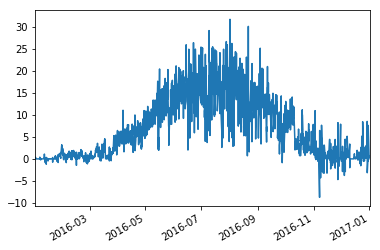

In [26]:
data_midday['GPP'].plot()

we can also make scatter plots in pandas from two columns and the plot.scatter method, try it out below on GPP and Temperature

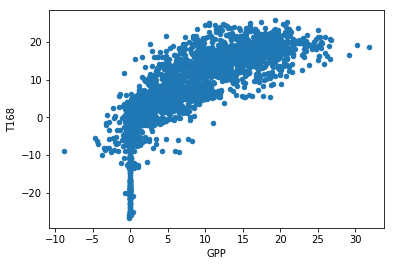

In [21]:
data_midday.plot.scatter('GPP','T168')

**Pandas** actually uses the **matplotlib** library to do its plotting. You can also apply this lib in a more conventional way, by using functions imported directly from the library. This is useful, if for example, you want to visualise some data but do not want to use Pandas. 

To get started, first we import the library using the following slightly unusual syntax:

In [24]:
import matplotlib.pyplot as plt

Next we use the *plt.plot()* function to plot our line plot above:

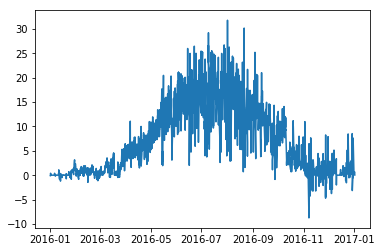

In [27]:
plt.plot(data_midday['GPP'])